#**Trabajo Práctico N°3**#
###**Alumna: Stephany Ramírez**###

##Ejercicio 4##
</br>A partir del archivo de anomalía de Bouguer de la $cuenca\,\,del\,\,salado$, cc-salado.dat, construya los mapas de isolíneas residual y regional por medio de la aplicación de polinomios de tendencia de grados 1, 2 y 3. Plantear conclusiones acerca de la comparación entre anomalías residuales y regionales.</br>


In [0]:
#Importo módulos
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import lstsq
import numpy
from scipy.interpolate import griddata
numpy.set_printoptions(threshold=sys.maxsize)

In [0]:
#Importo los datos necesarios
#
#Este comando permite abrir directamente una tabla de datos
#almacenada en un directorio web

data = np.loadtxt("http://carina.fcaglp.unlp.edu.ar/~jgomez/academic/mpp/data/cca-salado.dat")

#En caso de utilizar Google Drive se puede subir el archivo descomentando
#las siguientes lineas
#
#from google.colab import files
#files.upload()
#data = np.loadtxt('cca_salado.txt')
x,y,h,g_obs,ab = data[:,0],data[:,1],data[:,2],data[:,3],data[:,4]


UnicodeDecodeError: ignored

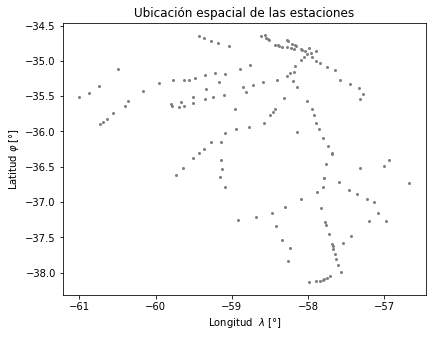

In [0]:
#Grafico los datos para observar su tendencia
#
#Creo gráfico de dispersión para visualizar la ubicación
#espacial de los datos
#
#Tamaño de la figura
plt.figure(figsize=(6.5,5))
plt.scatter(x,y,c='gray',s=4)
#
#Accesorios
plt.title('Ubicación espacial de las estaciones')
plt.xlabel(r'Longitud  $\lambda$ [°]')
plt.ylabel(r'Latitud $\varphi$ [°]')
#
plt.show()

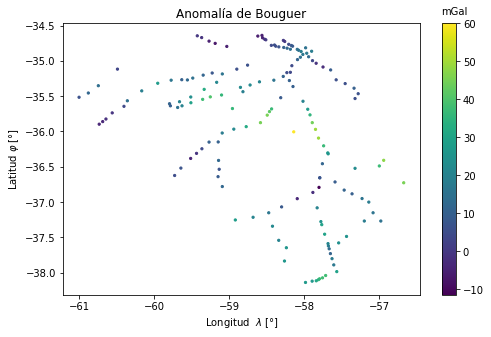

In [0]:
#Grafico los datos de anomalía para observar su tendencia
#
#Tamaño de figura
plt.figure(figsize=(8,5))
#
#Creo gráfico de dispersión con tercer eje de color
plt.scatter(x,y,c=ab,s=5)
#
#Accesorios
clb=plt.colorbar()
clb.set_label('mGal', labelpad=-30, y=1.06, rotation=0)
plt.title('Anomalía de Bouguer')
plt.xlabel(r'Longitud  $\lambda$ [°]')
plt.ylabel(r'Latitud $\varphi$ [°]')
#
plt.show()

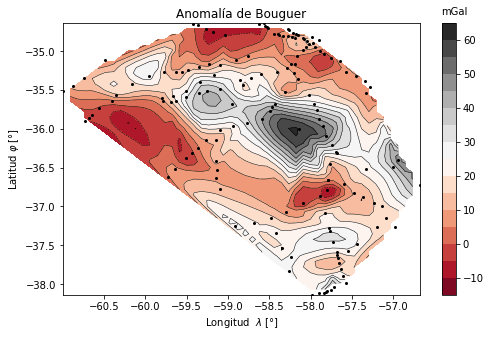

In [0]:
#Grafico los datos como contorno para observar su tendencia
#
#Bin size (Tamaño de las celdas de la grilla)
bin=50
#
#Definimos la extensión de la grilla
xi = np.linspace(min(x),max(x),bin)
yi = np.linspace(min(y),max(y),bin)
#
#Generamos la grilla
zi = griddata((x, y), ab, (xi[None,:], yi[:,None]), method='cubic')
#
#Tamaño de figura
plt.figure(figsize=(8,5))
#
#Generamos los gráficos de contorno
CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.RdGy)
#
#Aplicamos accesorios al gráfico anterior
clb=plt.colorbar()
clb.set_label('mGal', labelpad=-30, y=1.06, rotation=0)
plt.scatter(x,y,marker='o',c='k',s=4)
plt.xlim(min(x),max(x))
plt.ylim(min(y),max(y))
plt.title('Anomalía de Bouguer')
plt.xlabel(r'Longitud  $\lambda$ [°]')
plt.ylabel(r'Latitud $\varphi$ [°]')
#
plt.show()

###**Generación de polinomios de grado N**###

In [0]:
#Genero las matrices de diseño
#
#Matríz para el polinomio de grado 1
A1 = np.array([x,y,x*0+1]).T
#Matríz para el polinomio de grado 2
A2 = np.array([x**2,y**2,x*y,x,y,x*0+1]).T
#Matríz para el polinomio de grado 3
A3 = np.array([x**3,y**3,x**2*y,x*y**2,x**2,y**2,x*y,x,y,x*0+1]).T
#
#Ahora aplico herramientas de algebra lineal
#para resolver el problema por cuadrados minimos
#
m1 =np.linalg.lstsq(A1,ab,rcond=None)[0]
m2 =np.linalg.lstsq(A2,ab,rcond=None)[0]
m3 =np.linalg.lstsq(A3,ab,rcond=None)[0]
#
print('Coeficientes de grado 1:', m1)
print()
print('Coeficientes de grado 2:',m2)
print()
print('Coeficientes de grado 3:',m3)

Coeficientes de grado 1: [ 2.327 -4.305 -2.794]

Coeficientes de grado 2: [    -2.938     -4.542     -5.28    -531.604   -640.887 -27088.175]

Coeficientes de grado 3: [      -0.123       -8.409       -1.783       -4.653      -88.241
    -1191.302     -548.711   -15265.986   -59468.024 -1021852.676]


###**Calculo de la superficie de tendencia y el mapa residual**###
Con el vector de coeficientes obtenemos por medio del problema directo la superficie de tendencia en los puntos del dato leído:
</br>Aplicación del polinomio $\bar g=Am$
</br>Campo residual $\Delta g= g^o - \bar g$</br>

In [0]:
#Efecto del polinomio en los datos
#
ab1=A1.dot(m1)
ab2=A2.dot(m2)
ab3=A3.dot(m3)
#
#Ahora calculo el campo residual
#
dab1=ab-ab1
dab2=ab-ab2
dab3=ab-ab3
#

###**Gráfico de la aplicación de los polinomios de tendencia a los datos**###

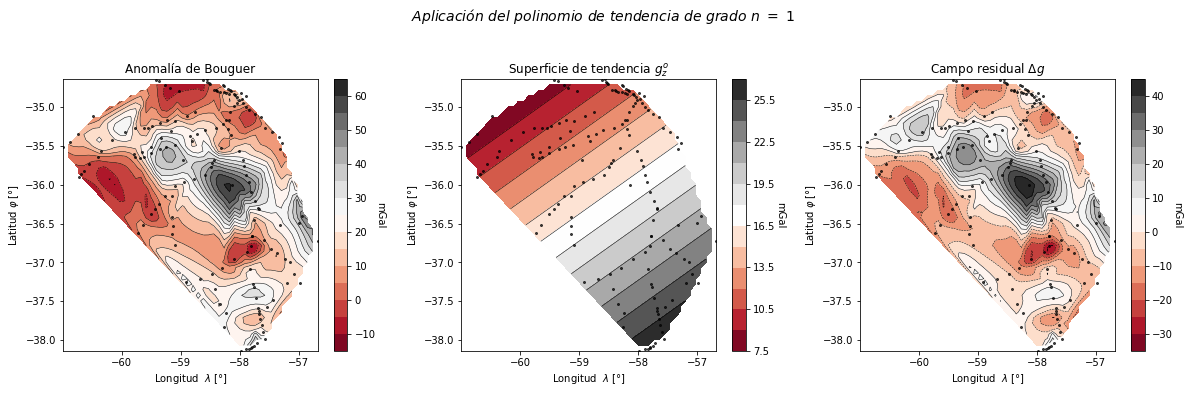

In [0]:
#Preparo los gráficos
#
ab1i = griddata((x, y), ab1, (xi[None,:], yi[:,None]), method='cubic')
dab1i = griddata((x, y), dab1, (xi[None,:], yi[:,None]), method='cubic')
#
fig, axs = plt.subplots(1,3)
#
plt.subplot(2,3,1)
plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
im=plt.contourf(xi,yi,zi,15,cmap=plt.cm.RdGy)
plt.scatter(x,y,marker='o',c='k',s=4,alpha=0.7)
plt.xlim(min(x),max(x))
plt.ylim(min(y),max(y))
clb=fig.colorbar(im, shrink=1)
clb.set_label('mGal', labelpad=10, y=0.5, rotation=270)
plt.title('Anomalía de Bouguer')
plt.xlabel(r'Longitud  $\lambda$ [°]')
plt.ylabel(r'Latitud $\varphi$ [°]')
#
plt.subplot(2,3,2)
plt.contour(xi,yi,ab1i,15,linewidths=0.5,colors='k')
im=plt.contourf(xi,yi,ab1i,15,cmap=plt.cm.RdGy)
plt.scatter(x,y,marker='o',c='k',s=4,alpha=0.7)
plt.xlim(min(x),max(x))
plt.ylim(min(y),max(y))
clb=fig.colorbar(im, shrink=1)
clb.set_label('mGal', labelpad=10, y=0.5, rotation=270)
plt.title(r'Superficie de tendencia $g_z^o$')
plt.xlabel(r'Longitud  $\lambda$ [°]')
plt.ylabel(r'Latitud $\varphi$ [°]')
#
plt.subplot(2,3,3)
plt.contour(xi,yi,dab1i,15,linewidths=0.5,colors='k')
im=plt.contourf(xi,yi,dab1i,15,cmap=plt.cm.RdGy)
plt.scatter(x,y,marker='o',c='k',s=4,alpha=0.7)
plt.xlim(min(x),max(x))
plt.ylim(min(y),max(y))
clb=fig.colorbar(im, shrink=1)
clb.set_label('mGal', labelpad=10, y=0.5, rotation=270)
plt.title(r'Campo residual $\Delta g$')
plt.xlabel(r'Longitud  $\lambda$ [°]')
plt.ylabel(r'Latitud $\varphi$ [°]')
#
plt.gcf().set_size_inches(20, 10)
fig.suptitle('$Aplicación\,\,del\,\,polinomio\,\,de\,\,tendencia\,\,de\,\,grado\,\,n\,\,=\,\,1$',fontsize=14)
plt.subplots_adjust(hspace=0, wspace=0.25)
#
plt.show()

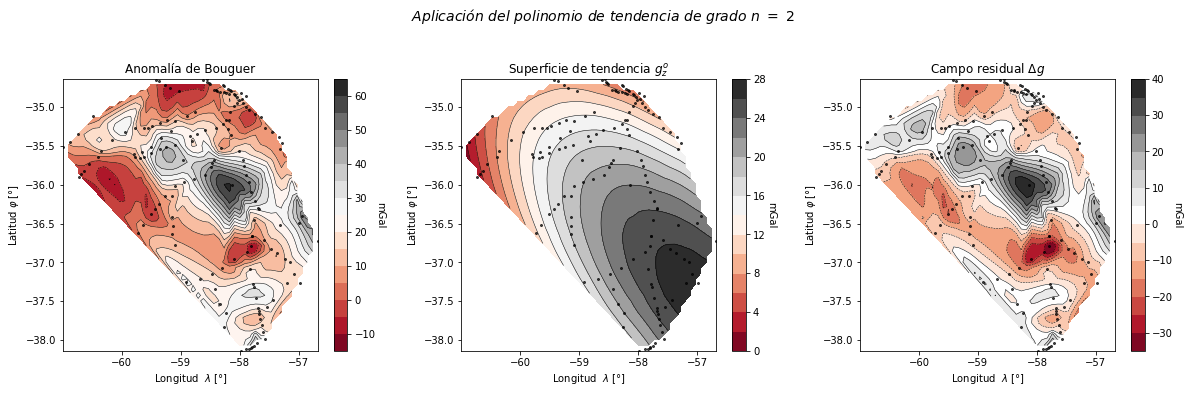

In [0]:
#Preparo los gráficos
#
ab2i = griddata((x, y), ab2, (xi[None,:], yi[:,None]), method='cubic')
dab2i = griddata((x, y), dab2, (xi[None,:], yi[:,None]), method='cubic')
#
fig, axs = plt.subplots(1,3)
#
plt.subplot(2,3,1)
plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
im=plt.contourf(xi,yi,zi,15,cmap=plt.cm.RdGy)
plt.scatter(x,y,marker='o',c='k',s=4,alpha=0.7)
plt.xlim(min(x),max(x))
plt.ylim(min(y),max(y))
clb=fig.colorbar(im, shrink=1)
clb.set_label('mGal', labelpad=10, y=0.5, rotation=270)
plt.title('Anomalía de Bouguer')
plt.xlabel(r'Longitud  $\lambda$ [°]')
plt.ylabel(r'Latitud $\varphi$ [°]')
#
plt.subplot(2,3,2)
plt.contour(xi,yi,ab2i,15,linewidths=0.5,colors='k')
im=plt.contourf(xi,yi,ab2i,15,cmap=plt.cm.RdGy)
plt.scatter(x,y,marker='o',c='k',s=4,alpha=0.7)
plt.xlim(min(x),max(x))
plt.ylim(min(y),max(y))
clb=fig.colorbar(im, shrink=1)
clb.set_label('mGal', labelpad=10, y=0.5, rotation=270)
plt.title(r'Superficie de tendencia $g_z^o$')
plt.xlabel(r'Longitud  $\lambda$ [°]')
plt.ylabel(r'Latitud $\varphi$ [°]')
#
plt.subplot(2,3,3)
plt.contour(xi,yi,dab2i,15,linewidths=0.5,colors='k')
im=plt.contourf(xi,yi,dab2i,15,cmap=plt.cm.RdGy)
plt.scatter(x,y,marker='o',c='k',s=4,alpha=0.7)
plt.xlim(min(x),max(x))
plt.ylim(min(y),max(y))
clb=fig.colorbar(im, shrink=1)
clb.set_label('mGal', labelpad=10, y=0.5, rotation=270)
plt.title(r'Campo residual $\Delta g$')
plt.xlabel(r'Longitud  $\lambda$ [°]')
plt.ylabel(r'Latitud $\varphi$ [°]')
#
plt.gcf().set_size_inches(20, 10)
fig.suptitle('$Aplicación\,\,del\,\,polinomio\,\,de\,\,tendencia\,\,de\,\,grado\,\,n\,\,=\,\,2$',fontsize=14)
plt.subplots_adjust(hspace=0, wspace=0.25)
#
plt.show()

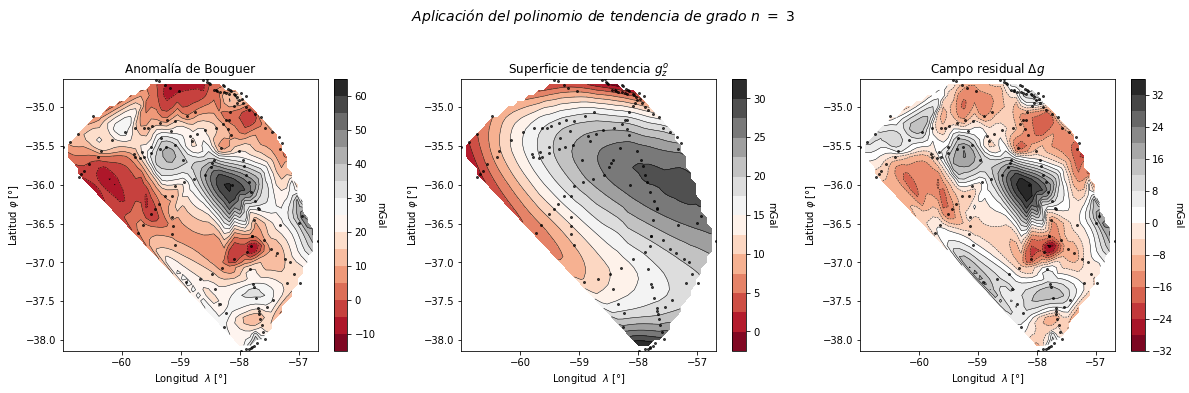

In [0]:
#Preparo los gráficos
#
ab3i = griddata((x, y), ab3, (xi[None,:], yi[:,None]), method='cubic')
dab3i = griddata((x, y), dab3, (xi[None,:], yi[:,None]), method='cubic')
#
fig, axs = plt.subplots(1,3)
#
plt.subplot(2,3,1)
plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
im=plt.contourf(xi,yi,zi,15,cmap=plt.cm.RdGy)
plt.scatter(x,y,marker='o',c='k',s=4,alpha=0.7)
plt.xlim(min(x),max(x))
plt.ylim(min(y),max(y))
clb=fig.colorbar(im, shrink=1)
clb.set_label('mGal', labelpad=10, y=0.5, rotation=270)
plt.title('Anomalía de Bouguer')
plt.xlabel(r'Longitud  $\lambda$ [°]')
plt.ylabel(r'Latitud $\varphi$ [°]')
#
plt.subplot(2,3,2)
plt.contour(xi,yi,ab3i,15,linewidths=0.5,colors='k')
im=plt.contourf(xi,yi,ab3i,15,cmap=plt.cm.RdGy)
plt.scatter(x,y,marker='o',c='k',s=4,alpha=0.7)
plt.xlim(min(x),max(x))
plt.ylim(min(y),max(y))
clb=fig.colorbar(im, shrink=1)
clb.set_label('mGal', labelpad=10, y=0.5, rotation=270)
plt.title(r'Superficie de tendencia $g_z^o$')
plt.xlabel(r'Longitud  $\lambda$ [°]')
plt.ylabel(r'Latitud $\varphi$ [°]')
#
plt.subplot(2,3,3)
plt.contour(xi,yi,dab3i,15,linewidths=0.5,colors='k')
im=plt.contourf(xi,yi,dab3i,15,cmap=plt.cm.RdGy)
plt.scatter(x,y,marker='o',c='k',s=4,alpha=0.7)
plt.xlim(min(x),max(x))
plt.ylim(min(y),max(y))
clb=fig.colorbar(im, shrink=1)
clb.set_label('mGal', labelpad=10, y=0.5, rotation=270)
plt.title(r'Campo residual $\Delta g$')
plt.xlabel(r'Longitud  $\lambda$ [°]')
plt.ylabel(r'Latitud $\varphi$ [°]')
#
plt.gcf().set_size_inches(20, 10)
fig.suptitle('$Aplicación\,\,del\,\,polinomio\,\,de\,\,tendencia\,\,de\,\,grado\,\,n\,\,=\,\,3$',fontsize=14)
plt.subplots_adjust(hspace=0, wspace=0.25)
#
plt.show()

##**Comentario final de los gráficos**##
</br> Para los tres casos expuestos anteriormente, vemos como existen diferencias apreciables entre cada aplicación de una superficie de tendencia asociada a un polinomio de grado distinto. Para el caso de grado n=1 han aparecido ciertas tendencias reisiduales en el mapa y se observa un poco más acentuada la anomalía negativa característica de la zona de estudio. Para el caso de grado n=2 y n=3 se comienza a detectar aún más, núcleos de anomalías residuales, siendo mayor para el caso de la superficie de tendencia de tercer grado.</br>